In [1]:
# type your code here
#used to perform dataframe related operations
import pandas as pd
#user to perform any mathematical operations
import numpy as np
#visualization 
import seaborn as sns
import matplotlib.pyplot as plt
#for scaling
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler#use std scaler only when the data is normal
#for transformation
from sklearn.preprocessing import PowerTransformer
#warnings
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.model_selection import train_test_split
#for performing linear regression
from statsmodels.api import OLS
from sklearn.linear_model import LinearRegression

#for testing performance of model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

from statsmodels.api import add_constant

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.tsa.api as smt

# import various functions from scipy
from scipy import stats

# import 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error


# functions for forward selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# functions for  cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor


In [3]:
df = pd.read_csv('Iowa Liquor Sales (Jan 2021-Jan 2022) (1).csv')

In [4]:
df

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-33179700135,04-01-2021,2576,Hy-Vee Wine and Spirits / Storm Lake,1250 N Lake St,Storm Lake,50588.0,POINT (-95.200758 42.65318400000001),11.0,BUENA VIST,...,64870,Fireball Cinnamon Whiskey,48,100,0.90,1.35,48,64.80,4.80,1.26
1,INV-33196200106,04-01-2021,2649,Hy-Vee #3 / Dubuque,400 Locust St,Dubuque,52001.0,POINT (-90.666497 42.49721900000001),31.0,DUBUQUE,...,65200,Tequila Rose Liqueur,12,750,11.50,17.25,4,69.00,3.00,0.79
2,INV-33184300011,04-01-2021,2539,Hy-Vee Food Store / Iowa Falls,640 S. Oak,Iowa Falls,50126.0,POINT (-93.262364 42.508752),42.0,HARDIN,...,38008,Smirnoff 80prf PET,6,1750,14.75,22.13,6,132.78,10.50,2.77
3,INV-33184100015,04-01-2021,4024,Wal-Mart 1546 / Iowa Falls,840 S Oak,Iowa Falls,50126.0,POINT (-93.262446 42.503407),42.0,HARDIN,...,36648,Caliber Vodka,12,750,3.31,4.97,12,59.64,9.00,2.37
4,INV-33174200025,04-01-2021,5385,Vine Food & Liquor,2704 Vine St.,West Des Moines,50265.0,POINT (-93.741511 41.580206),77.0,POLK,...,4626,Buchanan Deluxe 12YR,12,750,20.99,31.49,2,62.98,1.50,0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,INV-39816800042,03-09-2021,5868,Brothers Market / Bloomfield,207 E Locust St,Bloomfield,52537.0,POINT (-92.412847 40.752691),26.0,DAVIS,...,52316,Christian Bros Brandy,12,750,6.00,9.00,3,27.00,2.25,0.59
1048571,INV-39790400013,03-09-2021,5145,South Side Food Mart,1101 Army Post Rd,Des Moines,50315.0,POINT (-93.628783 41.526511),77.0,POLK,...,11788,Black Velvet,6,1750,10.45,15.68,6,94.08,10.50,2.77
1048572,INV-39806400009,03-09-2021,4585,Casey's General Store #2561 / Farley,"306, 1st St SW",Farley,52046.0,POINT (-91.006139 42.439552),31.0,DUBUQUE,...,26826,Jack Daniels Old #7 Black Label,12,750,15.57,23.36,12,280.32,9.00,2.37
1048573,INV-39782700007,03-09-2021,4795,Walgreens #00359 / Des Moines,2545 E Euclid Ave,Des Moines,50317.0,POINT (-93.568668 41.627702000000006),77.0,POLK,...,64866,Fireball Cinnamon Whiskey,12,750,9.00,13.50,12,162.00,9.00,2.37


In [5]:
df.shape

(1048575, 24)

In [171]:
df.columns

Index(['invoice_and_item_number', 'date', 'store_number', 'store_name',
       'address', 'city', 'zip_code', 'store_location', 'county_number',
       'county', 'category', 'category_name', 'vendor_number', 'vendor_name',
       'item_number', 'item_description', 'pack', 'bottle_volume_ml',
       'state_bottle_cost', 'state_bottle_retail', 'bottles_sold',
       'sale_dollars', 'volume_sold_liters', 'volume_sold_gallons'],
      dtype='object')

In [172]:
df = df.drop(['invoice_and_item_number', 'date','store_name','address','zip_code', 'store_location', 'county_number',
            'vendor_number','item_number','category','volume_sold_gallons'], axis = 1)

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   store_number         1048575 non-null  int64  
 1   city                 1048511 non-null  object 
 2   county               1048511 non-null  object 
 3   category_name        1048575 non-null  object 
 4   vendor_name          1048572 non-null  object 
 5   item_description     1048575 non-null  object 
 6   pack                 1048575 non-null  int64  
 7   bottle_volume_ml     1048575 non-null  int64  
 8   state_bottle_cost    1048575 non-null  float64
 9   state_bottle_retail  1048575 non-null  float64
 10  bottles_sold         1048575 non-null  int64  
 11  sale_dollars         1048575 non-null  float64
 12  volume_sold_liters   1048575 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 104.0+ MB


In [174]:
df.isnull().sum()

store_number            0
city                   64
county                 64
category_name           0
vendor_name             3
item_description        0
pack                    0
bottle_volume_ml        0
state_bottle_cost       0
state_bottle_retail     0
bottles_sold            0
sale_dollars            0
volume_sold_liters      0
dtype: int64

In [175]:
df1 = df.drop(['store_number','city','county','category_name','vendor_name','item_description'],axis = 1)

In [176]:
df1.describe()

,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.198848e+01,8.248567e+02,1.126751e+01,1.690189e+01,1.186573e+01,1.610171e+02,9.385574e+00
std,7.881474e+00,5.229357e+02,1.129648e+01,1.694280e+01,3.148000e+01,4.850953e+02,3.787383e+01
min,1.000000e+00,2.000000e+01,8.900000e-01,1.340000e+00,1.000000e+00,1.340000e+00,2.000000e-02
25%,6.000000e+00,3.750000e+02,6.000000e+00,9.000000e+00,3.000000e+00,4.200000e+01,1.500000e+00
50%,1.200000e+01,7.500000e+02,8.980000e+00,1.347000e+01,6.000000e+00,8.952000e+01,4.800000e+00
75%,1.200000e+01,1.000000e+03,1.400000e+01,2.100000e+01,1.200000e+01,1.665000e+02,1.050000e+01
max,6.000000e+01,5.250000e+03,1.949020e+03,2.923530e+03,3.780000e+03,5.643000e+04,6.615000e+03


In [177]:
df1.isnull().sum()

pack                   0
bottle_volume_ml       0
state_bottle_cost      0
state_bottle_retail    0
bottles_sold           0
sale_dollars           0
volume_sold_liters     0
dtype: int64

In [178]:
df1_clm = df1.columns

In [179]:
df1_clm

Index(['pack', 'bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail',
       'bottles_sold', 'sale_dollars', 'volume_sold_liters'],
      dtype='object')

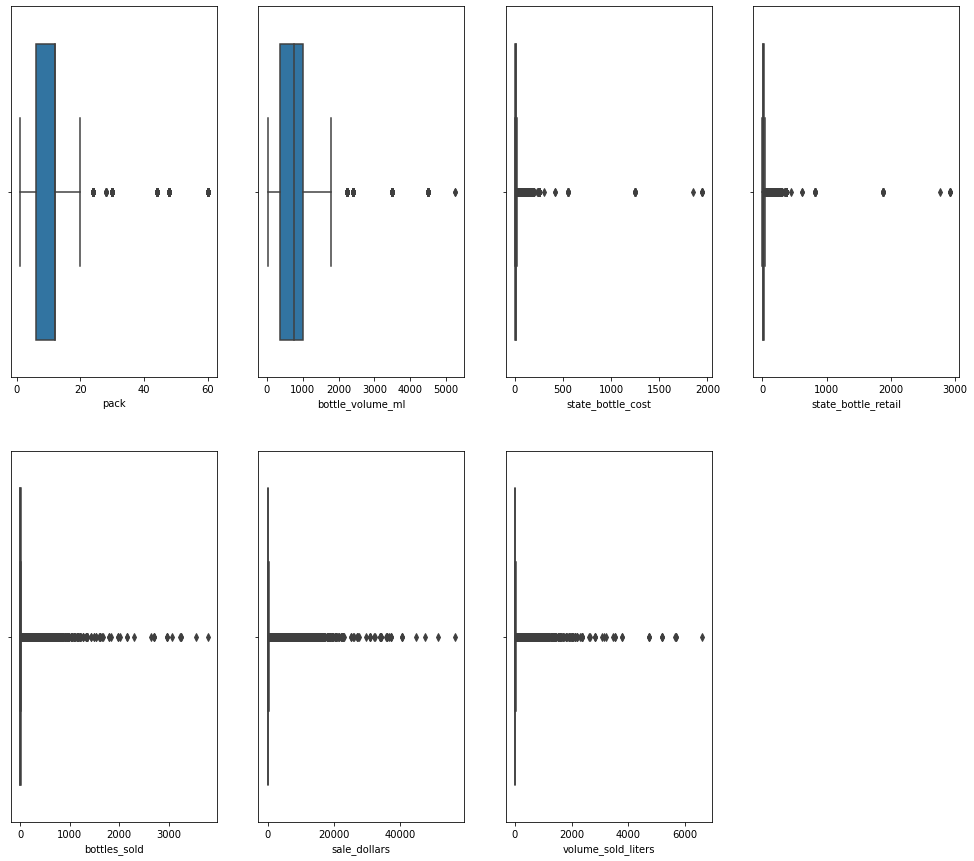

In [180]:
t=1
plt.figure(figsize = (17,15))
for i in df1_clm:
    plt.subplot(2,4,t)
    sns.boxplot(df1[i])
    t+=1
plt.show()

In [181]:
for i in df1_clm:
    q1,q3 = np.quantile(df1[i],[0.25,0.75])
    iqr = q3 - q1
    ub = q3 + (1.5 * iqr)
    lb = q1 - (1.5 * iqr)
    df1[i] = np.where(df1[i] > ub, ub, df1[i])
    df1[i] = np.where(df1[i] < lb, lb, df1[i])

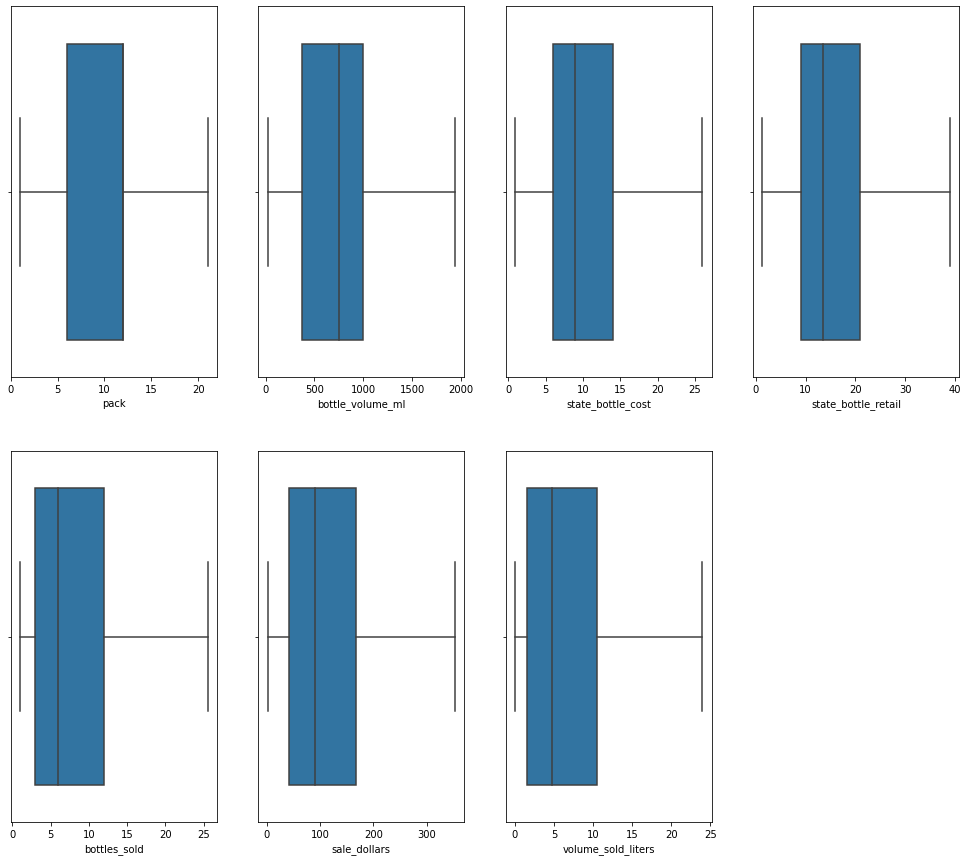

In [182]:
t=1
plt.figure(figsize = (17,15))
for i in df1_clm:
    plt.subplot(2,4,t)
    sns.boxplot(df1[i])
    t+=1
plt.show()

In [183]:
# fig,axs = plt.subplots(2,4,figsize =(15,15))
# for i, subplots in zip(df1_clm,axs.flatten()):
#     sns.distplot(df1[i],ax=subplots)
#     plt.title('df1[i]',fontsize = 15)
# plt.show()

In [184]:
df1.skew()

pack                   0.689615
bottle_volume_ml       0.559649
state_bottle_cost      0.938417
state_bottle_retail    0.938333
bottles_sold           1.123899
sale_dollars           1.061998
volume_sold_liters     1.161543
dtype: float64

In [185]:
# stats.probplot(df1['volume_sold_liters'], dist="norm", plot=plt)
# plt.title('Q-Q Plot')
# plt.show()

In [186]:
stat, p = stats.shapiro(df1['volume_sold_liters'])
alpha = 0.05  # significance level

print("Shapiro-Wilk test statistic:", stat)
print("p-value:", p)

if p < alpha:
    print("The data is normally distributed.")
else:
    print("The data is not normally distributed.")

Shapiro-Wilk test statistic: 0.8556922674179077
p-value: 0.0
The data is normally distributed.


In [187]:
# X = df1.drop(['volume_sold_liters'],axis =1)
# y= df1.volume_sold_liters

In [188]:
# X = sm.add_constant(X)

In [189]:
# X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.2)

In [190]:
# model_base = sm.OLS(y_train,X_train).fit()
# model_base.summary()

In [191]:
# y_pred = model_base.predict(X_test)

In [192]:
# model_base.rsquared

In [193]:
# scaler = MinMaxScaler()
# mm = scaler.fit_transform(df1)
# df_mm = pd.DataFrame(mm, columns= df1.columns)

In [194]:
# df_mm.skew()

In [195]:
# scaler = RobustScaler()
# rb = scaler.fit_transform(df1)
# df_rb = pd.DataFrame(mm, columns= df1.columns)

In [196]:
# df_rb.skew()

In [197]:
# X = df_mm.drop(['volume_sold_liters'],axis =1)
# y= df_mm.volume_sold_liters

In [198]:
# X = sm.add_constant(X)

In [199]:
# X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.2)  

In [200]:
# model_scaled_mm = sm.OLS(y_train,X_train).fit()
# model_scaled_mm.summary()

In [201]:
scaler = StandardScaler()
ss =  scaler.fit_transform(df1)
df_ss = pd.DataFrame(ss, columns= df1.columns)

In [202]:
df_ss.skew()

pack                   0.689615
bottle_volume_ml       0.559649
state_bottle_cost      0.938417
state_bottle_retail    0.938333
bottles_sold           1.123899
sale_dollars           1.061998
volume_sold_liters     1.161543
dtype: float64

In [203]:
# df_ss = np.log(df_ss)

In [204]:
# df_ss.skew()

In [205]:
X = df_ss.drop(['volume_sold_liters'],axis =1)
y= df_ss.volume_sold_liters

In [206]:
X = sm.add_constant(X)

In [207]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.2)

In [208]:
MLR_Score_Card = pd.DataFrame(columns=['Model_Name', 'Alpha', 
                                       'l1-ratio', 'R-Squared',
                                       'Adj. R-Squared', 'Test_RMSE','Train_RMSE','Test_MAPE'])
def update_MLR_Score_Card(algorithm_name, model, alpha = '-', l1_ratio = '-'):
    global MLR_Score_Card
    MLR_Score_Card = MLR_Score_Card.append({'Model_Name': algorithm_name,
                       'Alpha': alpha, 
                       'l1-ratio': l1_ratio, 
                       'Test_MAPE': get_test_mape(model), 
                       'Test_RMSE': get_test_rmse(model), 
                        'Train_RMSE': get_train_rmse(model),
                       'R-Squared': get_score(model)[0], 
                       'Adj. R-Squared': get_score(model)[1]}, ignore_index = True)

In [209]:
def get_train_rmse(model): 
    train_pred = model.predict(X_train)
    mse_train = mean_squared_error(y_train, train_pred)
    rmse_train = round(np.sqrt(mse_train), 4)
    return(rmse_train)

In [210]:
def get_test_rmse(model):
    test_pred = model.predict(X_test)
    mse_test = mean_squared_error(y_test, test_pred)
    rmse_test = round(np.sqrt(mse_test), 4)
    return(rmse_test)

In [211]:
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)
def get_test_mape(model):
    test_pred = model.predict(X_test)
    mape_test = mape(y_test, test_pred)
    return(mape_test)

In [212]:
def get_score(model):
    r_sq = model.score(X_train, y_train)
    n = X_train.shape[0]
    k = X_train.shape[1]
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    return ([r_sq, r_sq_adj])

In [213]:
model_scaled_ss = sm.OLS(y_train,X_train).fit()
model_scaled_ss.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     volume_sold_liters   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                 8.853e+05
Date:                Fri, 09 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:05:37   Log-Likelihood:            -3.5445e+05
No. Observations:              838860   AIC:                         7.089e+05
Df Residuals:                  838853   BIC:                         7.090e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.467e-05      0.000      0.086      0.931      -0.001       0.001
pack                   -0.1115      0.001   -190.315      0.000      -0.113      -0.110
bottle_volume_ml        0.4776      0.000    969.835      0.000       0.477       0.479
state_bottle_cost      -0.0810      0.027     -2.992      0.003      -0.134      -0.028
state_bottle_retail    -0.1291      0.027     -4.767      0.000      -0.182      -0.076
bottles_sold            0.5046      0.001    608.904      0.000       0.503       0.506
sale_dollars            0.3537      0.001    412.285      0.000       0.352       0.355
==============================================================================
Omnibus:                    84645.774   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           663140.944
Skew:                          -0.135   Prob(JB):                         0.00
Kurtosis:                       7.347   Cond. No.                         160.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [214]:
lin_reg=LinearRegression()
model_scaled_s=lin_reg.fit(X_train,y_train)
ypred=model_scaled_s.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,ypred))
print(rmse)
from sklearn.metrics import r2_score
r2=r2_score(y_test,ypred)
print(r2)

0.36899468229832383
0.8641077070686949


In [215]:
update_MLR_Score_Card(algorithm_name = 'Linear Regression (Standard Scaller)',
                      model = model_scaled_s)
MLR_Score_Card

,Model_Name,Alpha,l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Train_RMSE,Test_MAPE
0,Linear Regression (Standard Scaller),-,-,0.863621,0.86362,0.369,0.3692,38.580727


### SGD

In [216]:
sgd = SGDRegressor(random_state = 10)
linreg_with_SGD = sgd.fit(X_train, y_train)
print('RMSE on train set:', get_train_rmse(linreg_with_SGD))
print('RMSE on test set:', get_test_rmse(linreg_with_SGD))

RMSE on train set: 0.3696
RMSE on test set: 0.3693


In [217]:
update_MLR_Score_Card(algorithm_name = 'Linear Regression SGD', 
                      model = linreg_with_SGD)
MLR_Score_Card

,Model_Name,Alpha,l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Train_RMSE,Test_MAPE
0,Linear Regression (Standard Scaller),-,-,0.863621,0.863620,0.3690,0.3692,38.580727
1,Linear Regression SGD,-,-,0.863352,0.863351,0.3693,0.3696,38.398406


### Ridge alpha = 1

In [218]:
ridge = Ridge(alpha = 1, max_iter = 500)
ridge.fit(X_train, y_train)
print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 0.369


In [219]:
update_MLR_Score_Card(algorithm_name ='Ridge Regression (with alpha = 1)', 
                      model = ridge, alpha = 1)
MLR_Score_Card

,Model_Name,Alpha,l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Train_RMSE,Test_MAPE
0,Linear Regression (Standard Scaller),-,-,0.863621,0.863620,0.3690,0.3692,38.580727
1,Linear Regression SGD,-,-,0.863352,0.863351,0.3693,0.3696,38.398406
2,Ridge Regression (with alpha = 1),1,-,0.863621,0.863620,0.3690,0.3692,38.580702


### Ridge Alpha = 2

In [220]:
ridge = Ridge(alpha = 2, max_iter = 500)
ridge.fit(X_train, y_train)
print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 0.369


In [221]:
update_MLR_Score_Card(algorithm_name ='Ridge Regression (with alpha = 2)', 
                      model = ridge, alpha = '2')
MLR_Score_Card

,Model_Name,Alpha,l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Train_RMSE,Test_MAPE
0,Linear Regression (Standard Scaller),-,-,0.863621,0.863620,0.3690,0.3692,38.580727
1,Linear Regression SGD,-,-,0.863352,0.863351,0.3693,0.3696,38.398406
2,Ridge Regression (with alpha = 1),1,-,0.863621,0.863620,0.3690,0.3692,38.580702
3,Ridge Regression (with alpha = 2),2,-,0.863621,0.863620,0.3690,0.3692,38.580676


### Lasso

In [222]:
lasso = Lasso(alpha = 0.01, max_iter = 500)
lasso.fit(X_train, y_train)
print('RMSE on test set:', get_test_rmse(lasso))

RMSE on test set: 0.3702


In [223]:
update_MLR_Score_Card(algorithm_name ='Lasso Regression', 
                      model = lasso, alpha = '0.01')
MLR_Score_Card

,Model_Name,Alpha,l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Train_RMSE,Test_MAPE
0,Linear Regression (Standard Scaller),-,-,0.863621,0.863620,0.3690,0.3692,38.580727
1,Linear Regression SGD,-,-,0.863352,0.863351,0.3693,0.3696,38.398406
2,Ridge Regression (with alpha = 1),1,-,0.863621,0.863620,0.3690,0.3692,38.580702
3,Ridge Regression (with alpha = 2),2,-,0.863621,0.863620,0.3690,0.3692,38.580676
4,Lasso Regression,0.01,-,0.862812,0.862810,0.3702,0.3703,38.195035


### Elasticnet 

In [224]:
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.01, max_iter = 500)
enet.fit(X_train, y_train)
print('RMSE on test set:', get_test_rmse(enet))

RMSE on test set: 0.3754


In [225]:
update_MLR_Score_Card(algorithm_name ='Elastic Net Regression',
                      model = enet, alpha = '0.1', l1_ratio = '0.01')
MLR_Score_Card

,Model_Name,Alpha,l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Train_RMSE,Test_MAPE
0,Linear Regression (Standard Scaller),-,-,0.863621,0.863620,0.3690,0.3692,38.580727
1,Linear Regression SGD,-,-,0.863352,0.863351,0.3693,0.3696,38.398406
2,Ridge Regression (with alpha = 1),1,-,0.863621,0.863620,0.3690,0.3692,38.580702
3,Ridge Regression (with alpha = 2),2,-,0.863621,0.863620,0.3690,0.3692,38.580676
4,Lasso Regression,0.01,-,0.862812,0.862810,0.3702,0.3703,38.195035
5,Elastic Net Regression,0.1,0.01,0.859033,0.859032,0.3754,0.3754,36.652401


### Ridge Hyperparameter Tunning using GridSearchCV

In [226]:
# tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1,
#                               5, 10, 20, 40, 60, 80, 100]}]
# ridge = Ridge()
# ridge_grid = GridSearchCV(estimator = ridge, 
#                           param_grid = tuned_paramaters, 
#                           cv = 10)
# ridge_grid.fit(X_train, y_train)
# print('Best parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')
# print('RMSE on test set:', get_test_rmse(ridge_grid))

In [227]:
ridgeHP = Ridge(alpha = 100, max_iter = 500)
ridgeHP.fit(X_train, y_train)

Ridge(alpha=100, max_iter=500)

In [228]:
update_MLR_Score_Card(algorithm_name = 'Ridge Regression (using GridSearchCV)', 
                  model = ridgeHP, 
                  alpha = 100)
MLR_Score_Card

,Model_Name,Alpha,l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Train_RMSE,Test_MAPE
0,Linear Regression (Standard Scaller),-,-,0.863621,0.863620,0.3690,0.3692,38.580727
1,Linear Regression SGD,-,-,0.863352,0.863351,0.3693,0.3696,38.398406
2,Ridge Regression (with alpha = 1),1,-,0.863621,0.863620,0.3690,0.3692,38.580702
3,Ridge Regression (with alpha = 2),2,-,0.863621,0.863620,0.3690,0.3692,38.580676
4,Lasso Regression,0.01,-,0.862812,0.862810,0.3702,0.3703,38.195035
5,Elastic Net Regression,0.1,0.01,0.859033,0.859032,0.3754,0.3754,36.652401
6,Ridge Regression (using GridSearchCV),100,-,0.863621,0.863620,0.3690,0.3692,38.577992


### Lasso Hyperparameter Tunning using GridSearchCV

In [229]:
# from sklearn.model_selection import RepeatedKFold
# cv1 = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20]}]
# lasso = Lasso()
# lasso_grid = GridSearchCV(estimator = lasso, 
#                           param_grid = tuned_paramaters, 
#                           cv = cv1)
# lasso_grid.fit(X_train, y_train)
# print('Best parameters for Lasso Regression: ', lasso_grid.best_params_, '\n')
# print('RMSE on test set:', get_test_rmse(lasso_grid))

In [230]:
lassoHP = Lasso(alpha = 1e-8, max_iter = 500)
lassoHP.fit(X_train, y_train)

Lasso(alpha=1e-08, max_iter=500)

In [231]:
update_MLR_Score_Card(algorithm_name = 'Lasso Regression (using GridSearchCV)', 
                  model = lassoHP, 
                  alpha = 1e-8)
MLR_Score_Card

,Model_Name,Alpha,l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Train_RMSE,Test_MAPE
0,Linear Regression (Standard Scaller),-,-,0.863621,0.863620,0.3690,0.3692,38.580727
1,Linear Regression SGD,-,-,0.863352,0.863351,0.3693,0.3696,38.398406
2,Ridge Regression (with alpha = 1),1,-,0.863621,0.863620,0.3690,0.3692,38.580702
3,Ridge Regression (with alpha = 2),2,-,0.863621,0.863620,0.3690,0.3692,38.580676
4,Lasso Regression,0.01,-,0.862812,0.862810,0.3702,0.3703,38.195035
5,Elastic Net Regression,0.1,0.01,0.859033,0.859032,0.3754,0.3754,36.652401
6,Ridge Regression (using GridSearchCV),100,-,0.863621,0.863620,0.3690,0.3692,38.577992
7,Lasso Regression (using GridSearchCV),0.0,-,0.863618,0.863617,0.3690,0.3692,38.582514


### Elasticnet Hyperparameter Tunning using GridSearchCV

In [232]:
# tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],
#                       'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2]}] 
# enet = ElasticNet()
# enet_grid = GridSearchCV(estimator = enet, 
#                           param_grid = tuned_paramaters, 
#                           cv = 10)
# enet_grid.fit(X_train, y_train)
# print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')
# print('RMSE on test set:', get_test_rmse(enet_grid))

In [233]:
elHP = ElasticNet(alpha = 0.001,l1_ratio=0.0001, max_iter = 500)
elHP.fit(X_train, y_train)

ElasticNet(alpha=0.001, l1_ratio=0.0001, max_iter=500)

In [234]:
update_MLR_Score_Card(algorithm_name = 'Elastic Net Regression (using GridSearchCV)', 
                  model = elHP, 
                  alpha = 0.001, 
                  l1_ratio = 0.0001)
MLR_Score_Card

,Model_Name,Alpha,l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Train_RMSE,Test_MAPE
0,Linear Regression (Standard Scaller),-,-,0.863621,0.863620,0.3690,0.3692,38.580727
1,Linear Regression SGD,-,-,0.863352,0.863351,0.3693,0.3696,38.398406
2,Ridge Regression (with alpha = 1),1,-,0.863621,0.863620,0.3690,0.3692,38.580702
3,Ridge Regression (with alpha = 2),2,-,0.863621,0.863620,0.3690,0.3692,38.580676
4,Lasso Regression,0.01,-,0.862812,0.862810,0.3702,0.3703,38.195035
5,Elastic Net Regression,0.1,0.01,0.859033,0.859032,0.3754,0.3754,36.652401
6,Ridge Regression (using GridSearchCV),100,-,0.863621,0.863620,0.3690,0.3692,38.577992
7,Lasso Regression (using GridSearchCV),0.0,-,0.863618,0.863617,0.3690,0.3692,38.582514
8,Elastic Net Regression (using GridSearchCV),0.001,0.0001,0.863620,0.863619,0.3690,0.3692,38.556776


### Decision Tree

In [235]:
decision_tree_Regression = DecisionTreeRegressor(criterion = 'squared_error', 
                                                 random_state = 10)
decision_tree = decision_tree_Regression.fit(X_train, y_train)

In [236]:
print('RMSE on test set:', get_test_rmse(decision_tree))

RMSE on test set: 0.0334


In [237]:
update_MLR_Score_Card(algorithm_name ='decision tree Regression', 
                      model = decision_tree)
MLR_Score_Card

,Model_Name,Alpha,l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Train_RMSE,Test_MAPE
0,Linear Regression (Standard Scaller),-,-,0.863621,0.863620,0.3690,0.3692,38.580727
1,Linear Regression SGD,-,-,0.863352,0.863351,0.3693,0.3696,38.398406
2,Ridge Regression (with alpha = 1),1,-,0.863621,0.863620,0.3690,0.3692,38.580702
3,Ridge Regression (with alpha = 2),2,-,0.863621,0.863620,0.3690,0.3692,38.580676
4,Lasso Regression,0.01,-,0.862812,0.862810,0.3702,0.3703,38.195035
5,Elastic Net Regression,0.1,0.01,0.859033,0.859032,0.3754,0.3754,36.652401
6,Ridge Regression (using GridSearchCV),100,-,0.863621,0.863620,0.3690,0.3692,38.577992
7,Lasso Regression (using GridSearchCV),0.0,-,0.863618,0.863617,0.3690,0.3692,38.582514
8,Elastic Net Regression (using GridSearchCV),0.001,0.0001,0.863620,0.863619,0.3690,0.3692,38.556776
9,decision tree Regression,-,-,0.999179,0.999179,0.0334,0.0286,0.159738


In [238]:
#The 'criterion' parameter of DecisionTreeRegressor must be a str among {'poisson', 'absolute_error', 'friedman_mse', 'squared_error'}. Got 'entropy' instead.


In [239]:
# tuned_paramaters = [{'criterion': ['friedman_mse', 'squared_error'], 
#                      'max_depth': [None,5],
#                      'max_features': ["sqrt", "log2"],
#                      'min_samples_split': [2,5],
#                      'min_samples_leaf': [1,2],
#                      'max_leaf_nodes': range(1, 10)}]
# decision_tree_Regression = DecisionTreeRegressor(random_state = 10)
# tree_grid = GridSearchCV(estimator = decision_tree_Regression, 
#                          param_grid = tuned_paramaters, 
#                          cv = 10)
# tree_grid_model = tree_grid.fit(X_train, y_train)
# print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

In [240]:
dt_model = DecisionTreeRegressor(criterion = 'friedman_mse',
                                  max_depth = 2,
                                  max_features = 'sqrt',
                                  max_leaf_nodes = 4,
                                  min_samples_leaf = 1,
                                  min_samples_split = 2,
                                  random_state = 10)

# use fit() to fit the model on the train set
dt_model = dt_model.fit(X_train, y_train)

In [241]:
update_MLR_Score_Card(algorithm_name ='Decision Tree (Tunned Parameter)', model = dt_model)
MLR_Score_Card

,Model_Name,Alpha,l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Train_RMSE,Test_MAPE
0,Linear Regression (Standard Scaller),-,-,0.863621,0.863620,0.3690,0.3692,38.580727
1,Linear Regression SGD,-,-,0.863352,0.863351,0.3693,0.3696,38.398406
2,Ridge Regression (with alpha = 1),1,-,0.863621,0.863620,0.3690,0.3692,38.580702
3,Ridge Regression (with alpha = 2),2,-,0.863621,0.863620,0.3690,0.3692,38.580676
4,Lasso Regression,0.01,-,0.862812,0.862810,0.3702,0.3703,38.195035
5,Elastic Net Regression,0.1,0.01,0.859033,0.859032,0.3754,0.3754,36.652401
6,Ridge Regression (using GridSearchCV),100,-,0.863621,0.863620,0.3690,0.3692,38.577992
7,Lasso Regression (using GridSearchCV),0.0,-,0.863618,0.863617,0.3690,0.3692,38.582514
8,Elastic Net Regression (using GridSearchCV),0.001,0.0001,0.863620,0.863619,0.3690,0.3692,38.556776
9,decision tree Regression,-,-,0.999179,0.999179,0.0334,0.0286,0.159738


### Random Forest 

In [242]:
rf_regression = RandomForestRegressor(n_estimators = 10, random_state = 10)
rf_model = rf_regression.fit(X_train, y_train)

In [243]:
print('RMSE on test set:', get_test_rmse(rf_model))

RMSE on test set: 0.0332


In [244]:
update_MLR_Score_Card(algorithm_name ='Random Forest Regression', model = rf_model)
MLR_Score_Card

,Model_Name,Alpha,l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Train_RMSE,Test_MAPE
0,Linear Regression (Standard Scaller),-,-,0.863621,0.863620,0.3690,0.3692,38.580727
1,Linear Regression SGD,-,-,0.863352,0.863351,0.3693,0.3696,38.398406
2,Ridge Regression (with alpha = 1),1,-,0.863621,0.863620,0.3690,0.3692,38.580702
3,Ridge Regression (with alpha = 2),2,-,0.863621,0.863620,0.3690,0.3692,38.580676
4,Lasso Regression,0.01,-,0.862812,0.862810,0.3702,0.3703,38.195035
5,Elastic Net Regression,0.1,0.01,0.859033,0.859032,0.3754,0.3754,36.652401
6,Ridge Regression (using GridSearchCV),100,-,0.863621,0.863620,0.3690,0.3692,38.577992
7,Lasso Regression (using GridSearchCV),0.0,-,0.863618,0.863617,0.3690,0.3692,38.582514
8,Elastic Net Regression (using GridSearchCV),0.001,0.0001,0.863620,0.863619,0.3690,0.3692,38.556776
9,decision tree Regression,-,-,0.999179,0.999179,0.0334,0.0286,0.159738


### Random Forest Regression Grid Search CV

In [245]:
# tuned_paramaters_rf = [{'criterion': ['friedman_mse', 'squared_error'],
#                      'n_estimators': [10, 30, 50, 70, 90],
#                      'max_depth': [10, 15, 20],
#                      'max_features': ['sqrt', 'log2'],
#                      'min_samples_split': range(1,10),
#                      'min_samples_leaf': range(1,10),
#                      'max_leaf_nodes': range(1,10)}]
# random_forest_Regression = RandomForestRegressor(random_state = 10)
# rf_grid = GridSearchCV(estimator = random_forest_Regression, 
#                        param_grid = tuned_paramaters_rf, 
#                        cv = 10)
# rf_grid_model = rf_grid.fit(X_train, y_train)
# print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

In [246]:
# rf_model = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
#                                   n_estimators = rf_grid_model.best_params_.get('n_estimators'),
#                                   max_depth = rf_grid_model.best_params_.get('max_depth'),
#                                   max_features = rf_grid_model.best_params_.get('max_features'),
#                                   max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
#                                   min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
#                                   min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
#                                   random_state = 10)
# rf_model = rf_model.fit(X_train, y_train)
# print('Classification Report for test set:\n', get_test_report(rf_model,test_data = X_test))

In [247]:
# important_features = pd.DataFrame({'Features': X_train.columns, 
#                                    'Importance': rf_model.feature_importances_})
# important_features = important_features.sort_values('Importance', ascending = False)
# sns.barplot(x = 'Importance', y = 'Features', data = important_features)
# plt.title('Feature Importance', fontsize = 15)
# plt.xlabel('Importance', fontsize = 15)
# plt.ylabel('Features', fontsize = 15)
# plt.show()

### Ada Boost

In [248]:
ada_model = AdaBoostRegressor(n_estimators = 40, random_state = 10)
ada_model1 = ada_model.fit(X_train, y_train)

In [249]:
print('RMSE on test set:', get_test_rmse(ada_model1))

RMSE on test set: 0.4107


In [250]:
update_MLR_Score_Card(algorithm_name ='Ada Boost Regression', model = ada_model1)
MLR_Score_Card

,Model_Name,Alpha,l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Train_RMSE,Test_MAPE
0,Linear Regression (Standard Scaller),-,-,0.863621,0.863620,0.3690,0.3692,38.580727
1,Linear Regression SGD,-,-,0.863352,0.863351,0.3693,0.3696,38.398406
2,Ridge Regression (with alpha = 1),1,-,0.863621,0.863620,0.3690,0.3692,38.580702
3,Ridge Regression (with alpha = 2),2,-,0.863621,0.863620,0.3690,0.3692,38.580676
4,Lasso Regression,0.01,-,0.862812,0.862810,0.3702,0.3703,38.195035
5,Elastic Net Regression,0.1,0.01,0.859033,0.859032,0.3754,0.3754,36.652401
6,Ridge Regression (using GridSearchCV),100,-,0.863621,0.863620,0.3690,0.3692,38.577992
7,Lasso Regression (using GridSearchCV),0.0,-,0.863618,0.863617,0.3690,0.3692,38.582514
8,Elastic Net Regression (using GridSearchCV),0.001,0.0001,0.863620,0.863619,0.3690,0.3692,38.556776
9,decision tree Regression,-,-,0.999179,0.999179,0.0334,0.0286,0.159738


### Gradient Boosting Regression

In [251]:
# gboost_model = GradientBoostingRegressor(n_estimators = 150, max_depth = 10, random_state = 10)
# gboost_model.fit(X_train, y_train)

### XGB Regression 

In [252]:
xgb_model = XGBRegressor(max_depth = 10, gamma = 1)
xgb_model1 = xgb_model.fit(X_train, y_train)

In [253]:
print('RMSE on test set:', get_test_rmse(xgb_model1))

RMSE on test set: 0.034


In [254]:
update_MLR_Score_Card(algorithm_name ='XGB Regression', model = xgb_model1)
MLR_Score_Card

,Model_Name,Alpha,l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Train_RMSE,Test_MAPE
0,Linear Regression (Standard Scaller),-,-,0.863621,0.863620,0.3690,0.3692,38.580727
1,Linear Regression SGD,-,-,0.863352,0.863351,0.3693,0.3696,38.398406
2,Ridge Regression (with alpha = 1),1,-,0.863621,0.863620,0.3690,0.3692,38.580702
3,Ridge Regression (with alpha = 2),2,-,0.863621,0.863620,0.3690,0.3692,38.580676
4,Lasso Regression,0.01,-,0.862812,0.862810,0.3702,0.3703,38.195035
5,Elastic Net Regression,0.1,0.01,0.859033,0.859032,0.3754,0.3754,36.652401
6,Ridge Regression (using GridSearchCV),100,-,0.863621,0.863620,0.3690,0.3692,38.577992
7,Lasso Regression (using GridSearchCV),0.0,-,0.863618,0.863617,0.3690,0.3692,38.582514
8,Elastic Net Regression (using GridSearchCV),0.001,0.0001,0.863620,0.863619,0.3690,0.3692,38.556776
9,decision tree Regression,-,-,0.999179,0.999179,0.0334,0.0286,0.159738


### Stacking Regression

In [255]:
base_learners = [('rf_model', RandomForestRegressor(criterion = 'squared_error', max_depth = 10, max_features = 'sqrt', 
                                                     max_leaf_nodes = 8, min_samples_leaf = 5, min_samples_split = 2, 
                                                     n_estimators = 50, random_state = 10)),
                 ('Decision_Tree', DecisionTreeRegressor(criterion = 'squared_error', random_state = 10)),
                 ('XGB', XGBRegressor(max_depth = 10, gamma = 1))]

# initialize stacking classifier 
# pass the base learners to the parameter, 'estimators'
# pass the Naive Bayes model as the 'final_estimator'/ meta model
stack_model = StackingRegressor(estimators = base_learners, final_estimator = DecisionTreeRegressor(criterion = 'squared_error', random_state = 10))

# fit the model on train dataset
stack_model1 = stack_model.fit(X_train, y_train)

In [256]:
update_MLR_Score_Card(algorithm_name ='Stacking Regression', model = stack_model1)
MLR_Score_Card

,Model_Name,Alpha,l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Train_RMSE,Test_MAPE
0,Linear Regression (Standard Scaller),-,-,0.863621,0.863620,0.3690,0.3692,38.580727
1,Linear Regression SGD,-,-,0.863352,0.863351,0.3693,0.3696,38.398406
2,Ridge Regression (with alpha = 1),1,-,0.863621,0.863620,0.3690,0.3692,38.580702
3,Ridge Regression (with alpha = 2),2,-,0.863621,0.863620,0.3690,0.3692,38.580676
4,Lasso Regression,0.01,-,0.862812,0.862810,0.3702,0.3703,38.195035
5,Elastic Net Regression,0.1,0.01,0.859033,0.859032,0.3754,0.3754,36.652401
6,Ridge Regression (using GridSearchCV),100,-,0.863621,0.863620,0.3690,0.3692,38.577992
7,Lasso Regression (using GridSearchCV),0.0,-,0.863618,0.863617,0.3690,0.3692,38.582514
8,Elastic Net Regression (using GridSearchCV),0.001,0.0001,0.863620,0.863619,0.3690,0.3692,38.556776
9,decision tree Regression,-,-,0.999179,0.999179,0.0334,0.0286,0.159738


In [257]:
MLR_Score_Card = MLR_Score_Card.sort_values('Test_RMSE').reset_index(drop = True)
MLR_Score_Card.style.highlight_min(color = 'lightblue', subset = 'Test_RMSE')

,Model_Name,Alpha,l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Train_RMSE,Test_MAPE
0,Random Forest Regression,-,-,0.999167,0.999167,0.033200,0.028900,0.163628
1,decision tree Regression,-,-,0.999179,0.999179,0.033400,0.028600,0.159738
2,XGB Regression,-,-,0.999072,0.999072,0.034000,0.030500,0.679226
3,Stacking Regression,-,-,0.998826,0.998826,0.037000,0.034200,0.169593
4,Linear Regression (Standard Scaller),-,-,0.863621,0.863620,0.369000,0.369200,38.580727
5,Ridge Regression (with alpha = 1),1,-,0.863621,0.863620,0.369000,0.369200,38.580702
6,Ridge Regression (with alpha = 2),2,-,0.863621,0.863620,0.369000,0.369200,38.580676
7,Ridge Regression (using GridSearchCV),100,-,0.863621,0.863620,0.369000,0.369200,38.577992
8,Lasso Regression (using GridSearchCV),0.000000,-,0.863618,0.863617,0.369000,0.369200,38.582514
9,Elastic Net Regression (using GridSearchCV),0.001000,0.000100,0.863620,0.863619,0.369000,0.369200,38.556776
